In [1]:
#dependencies
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
path='D:/Data Science/Machine Learning/Machine_Learning/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression\Section 4 - Simple Linear Regression/'
df=pd.read_csv(path+'Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=df.iloc[:,0].values #independent variable
y=df.iloc[:,1].values #dependent variable

In [5]:
x,y=torch.from_numpy(x),torch.from_numpy(y)

In [6]:
print(x)

tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
         3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
         5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
         8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000],
       dtype=torch.float64)


In [7]:
print(y)

tensor([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
         64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,  67938.,
         66029.,  83088.,  81363.,  93940.,  91738.,  98273., 101302., 113812.,
        109431., 105582., 116969., 112635., 122391., 121872.],
       dtype=torch.float64)


In [8]:
#total samples
torch.numel(x) #to find the total number of elements

30

In [9]:
train_size=0.8*30#20 percent of the data=24

In [10]:
x_train,y_train,x_test,y_test=x[:24],y[:24],x[24:],y[24:]

In [11]:
#printing the shape of each
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([24])
torch.Size([24])
torch.Size([6])
torch.Size([6])


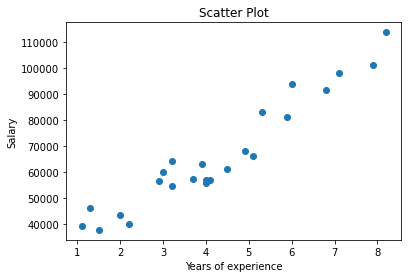

In [12]:
plt.scatter(x_train,y_train)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.show()

In [13]:
#y=mx+c
#here c is the bias that we will have 
#m is the weight or slope
#x,y independent and dependent varaible resp.

In [14]:
m,c=torch.randn(24,requires_grad=True),torch.randn(24,requires_grad=True)
print(m)
print(c)

tensor([-0.9106, -0.8722, -1.3318, -0.4220,  0.3752, -0.4594, -0.0186,  0.8910,
         0.5777,  1.2361, -0.1749, -0.0420,  1.1878,  0.2229, -0.3383, -0.1718,
        -1.7934, -0.5112,  1.3540, -1.5285,  1.3032, -1.3901,  0.8975,  1.5249],
       requires_grad=True)
tensor([-0.0196, -1.3625,  0.0125, -1.1594, -0.4420, -0.9959,  0.3635, -0.6018,
        -1.0911, -2.0272, -0.5228,  0.6352, -1.0188,  1.5032, -0.7270, -0.4117,
        -1.1910,  0.5346, -0.1988,  0.0073,  0.1303, -1.0499,  0.9785,  0.3123],
       requires_grad=True)


In [15]:
def model(x):
    x=x.double()
    return x*m.t()+c

In [16]:
predictions=model(x_train) #it is just to show how it will predict

In [17]:
predictions #so here we see the predictions are way to vague

tensor([ -1.0212,  -2.4964,  -1.9852,  -2.0034,   0.3835,  -2.3280,   0.3077,
          2.2494,   0.7574,   2.5463,  -1.2048,   0.4673,   3.7323,   2.4170,
         -2.2493,  -1.2537, -10.3373,  -2.1745,   7.7896,  -9.1637,   8.9923,
        -10.9198,   8.0687,  12.8166], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [18]:
y_train #here just to give an idea how vastly the values are varying

tensor([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
         64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,  67938.,
         66029.,  83088.,  81363.,  93940.,  91738.,  98273., 101302., 113812.],
       dtype=torch.float64)

In [19]:
#now we we will compare how the predictions are as compared to our target variables
def mse(t1,t2):
    diff=t1-t2
    return torch.sum(diff**2/diff.numel())

In [20]:
#here diff can be understood as targets-predicted values

In [21]:
mse(y_train,predictions) #so the number here is gigantic af! 
#need not worry will bring it down

tensor(4.8235e+09, dtype=torch.float64, grad_fn=<SumBackward0>)

In [22]:
loss=mse(y_train,predictions)
loss.backward()

In [23]:
#checking grads
m.grad

tensor([ -3606.5354,  -5005.8120,  -4716.6230,  -7254.5005,  -7313.2798,
        -13689.0459, -15037.4229, -14518.0664, -17185.1309, -17632.4902,
        -20546.2422, -18597.8438, -18984.4219, -19501.8496, -22917.4688,
        -27741.8613, -28066.7188, -36698.1602, -39999.6445, -46974.5820,
        -51979.7695, -58151.3203, -66685.1719, -77762.7734])

In [24]:
c.grad

tensor([-3278.6685, -3850.6248, -3144.4155, -3627.2502, -3324.2180, -4720.3608,
        -5012.4741, -4536.8960, -5370.3535, -4765.5376, -5268.2671, -4649.4609,
        -4746.1055, -4756.5483, -5092.7710, -5661.6045, -5503.2783, -6924.1812,
        -6779.6011, -7829.0972, -7644.0840, -8190.3267, -8441.1611, -9483.2656])

In [25]:
#initialising the grads to zero 
m.grad.zero_()
c.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#this is how you adjust weights
with torch.no_grad(): #with this in play torch will not track or modify the grad of tensors
    m-=m.grad*1e-2
    c-=c.grad*1e-2
    m.grad.zero_()
    c.grad.zero_()

In [29]:
#now training the data for multiple epochs
for i in range(3000):
    pred=model(x_train)
    loss=mse(y_train,pred)
    loss.backward()
    with torch.no_grad():
        m-=m.grad*1e-2
        c-=c.grad*1e-2
        m.grad.zero_()
        c.grad.zero_()

In [30]:
#to verify the loss
preds=model(x_train)
loss=mse(y_train,preds)
print(loss)

tensor(26.8843, dtype=torch.float64, grad_fn=<SumBackward0>)


In [46]:
x1=x_train.detach().numpy()
m1=m.detach().numpy()
c1=c.detach().numpy()

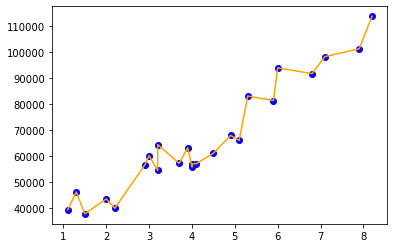

In [52]:
plt.plot(x1,m1*x1+c1,c='orange')
plt.scatter(x_train,y_train,c='blue')

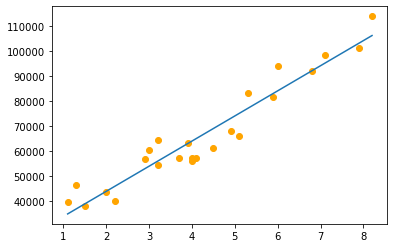

In [56]:
m, b = np.polyfit(x1, y_train, 1)
plt.plot(x1, m*x1 + b)
plt.scatter(x_train,y_train,c='orange')